In [10]:
import pandas as pd
import numpy as np
import re
import statistics
import matplotlib.pyplot as plt
import glob,os
#from collections import defaultdict
#from pathlib import Path
import dask.array as da
import dask.dataframe as dd
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#import dask.dataframe as dd
#dataf = dd.read_csv('/*.txt')
path = r'H:\italy_data1\data' # use your path
all_files = glob.glob(path + "/*.txt")
nfiles=0
dataf=str("")
for filename in all_files:
    data = open(filename, "r")
    data1 = data.read()
    dataf=dataf+'\n'+data1
    nfiles=nfiles+1

#li = []
#for filename in all_files:
  #  with io.open(filename, 'rb') as data:
   #     content = data.read()
      #  df = pd.read(filename)
       # li.append(df)
#dataf = pd.concat(li, axis=0, ignore_index=True)
# doesn't create a list, nor does it append to one
ncells=50
data_reshape = dataf.replace('\t\t','\t0\t')# to insert 0 in empty places
data_reshape = data_reshape.replace('\t\t','\t0\t')# to insert 0 in empty places again
data_reshape = data_reshape.replace('\t\n','\t0\n')# to insert 0 in empty places again
data_num = data_reshape.split()
data_array = da.asarray(data_num)
data_array_shaped1 = data_array.reshape(int(len(data_array)/8),8)
data_array_shaped1 = data_array_shaped1.astype(float)
data_frame1 =dd.io.from_dask_array(data_array_shaped1,columns = ['Square id' , 'Time interval', 'Country code','SMS-in activity','SMS-out activity','Call-in activity','Call-out activity','Internet traffic activity'])
data_frame1['SMS activity'] = data_frame1['SMS-in activity']+data_frame1['SMS-out activity']
data_frame1['call activity'] = data_frame1['Call-in activity']+data_frame1['Call-out activity']
day_activity = data_frame1[['Square id' , 'Time interval']]
day_activity['total activity']=data_frame1['call activity']+data_frame1['SMS activity'] +data_frame1['Internet traffic activity']
list_activity=list(day_activity['total activity'])
day_activity = day_activity.set_index('Square id')
day_activity_agg = day_activity.groupby(['Square id','Time interval']).sum().compute()
#total_activity = dd.io.from_dask_array(da.zeros([len(day_activity)-1,5]),columns = ['Square id' , 'Time interval','SMS activity','call activity','Internet traffic activity'])
#print(day_activity_agg.head(4*144))
#day_activity_agg.head(144).plot(y='total activity')
#plt.show()
#plt(day_activity_agg.iloc[144:2*144, 3])
#plt.show()
missed_rows=len(day_activity_agg.loc[:,'total activity'])
range_missed=nfiles*1440000-missed_rows
print(range_missed)
day_activity_agg_missed=day_activity_agg.head(range_missed)
day_activity_agg=day_activity_agg.append(day_activity_agg_missed)
#print(len(day_activity_agg.loc[:,'total activity']))
day_activity_agg_list=list(day_activity_agg.loc[:,'total activity'])
day_activity_agg_array=np.asarray(day_activity_agg_list)
day_activity_agg_array=day_activity_agg_array.reshape([10000,nfiles*144])# 144 time steps, 10000 series
sil_score_max = -1 #this is the minimum possible scor
distortions = []



149


The average silhouette score for 3 clusters is 0.72
The average silhouette score for 4 clusters is 0.60
The average silhouette score for 5 clusters is 0.53
The average silhouette score for 6 clusters is 0.50
The average silhouette score for 7 clusters is 0.49
The average silhouette score for 8 clusters is 0.52


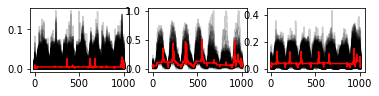

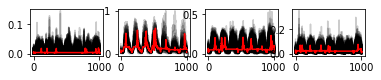

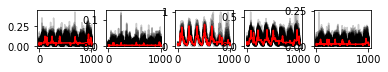

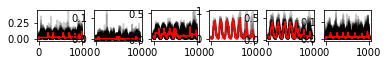

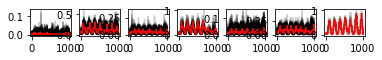

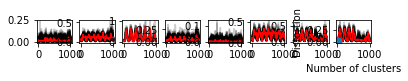

In [3]:
day_activity_agg_arry_norm = (day_activity_agg_array-day_activity_agg_array.min())/(day_activity_agg_array.max()-day_activity_agg_array.min())
for n_clusters in range(3,9):
  km = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw")
  x = day_activity_agg_arry_norm
  y = km.fit_predict(x)
  sil_score = silhouette_score(x, y)
  print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
  distortions.append(km.inertia_)
  plt.figure()
  for yi in range(n_clusters):
    plt.subplot(n_clusters, n_clusters, yi + 1)
    for xx in x[y == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    #plt.xlim(0, 144)
    #plt.ylim(-4, 4)
    #plt.text(0.55, 0.85,'Cluster %d' % (n_clusters + 1), transform=plt.gca().transAxes)
    if n_clusters == 1:
        plt.title("Euclidean $k$-means")
plt.plot(range ( 3 , 9), distortions, marker= 'o' )
plt.xlabel( 'Number of clusters' )
plt.ylabel( 'Distortion' )
plt.show()

#total_activity_list=zeros(1,10000)
#u=range(1,10000)
#for i in u:
#    total_activity_list[i]=len(day_activity_agg.loc[i,'total activity'])
#print(total_activity_list)
#indices = [i for i, x in enumerate(total_activity_list) if (x == 142)]
#print(indices)


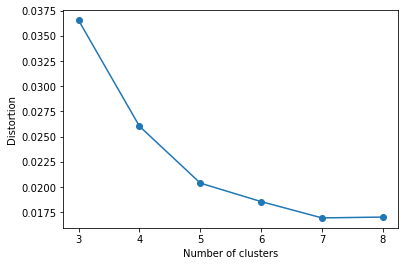

In [4]:
plt.plot(range ( 3 , 9), distortions, marker= 'o' )
plt.xlabel( 'Number of clusters' )
plt.ylabel( 'Distortion' )
plt.show()

The average silhouette score for 7 clusters is 0.53
[0.017246968552830064]


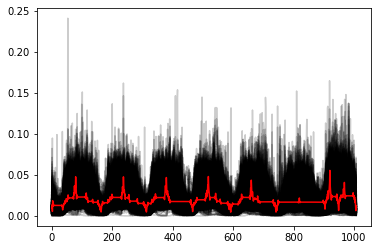

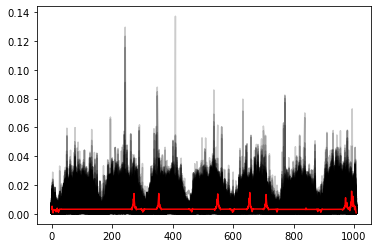

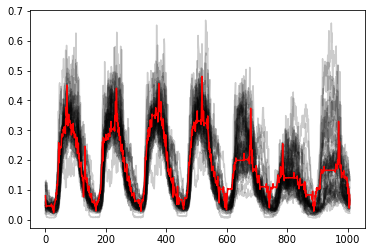

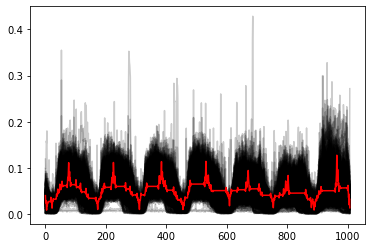

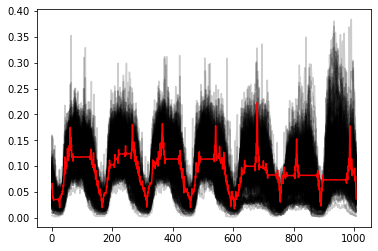

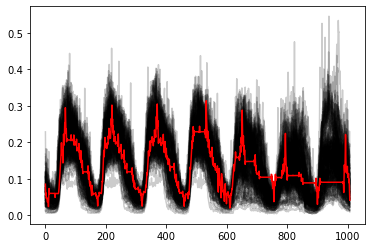

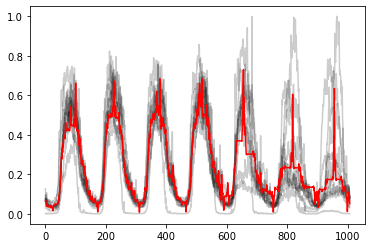

In [11]:
day_activity_agg_arry_norm = (day_activity_agg_array-day_activity_agg_array.min())/(day_activity_agg_array.max()-day_activity_agg_array.min())
for n_clusters in range(7,8):
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw")
    x = day_activity_agg_arry_norm
    y = km.fit_predict(x)
    sil_score = silhouette_score(x, y)
    print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
    distortions.append(km.inertia_)
    for yi in range(n_clusters):
        plt.figure()
#plt.subplot(n_clusters, n_clusters, yi + 1)
        for xx in x[y == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    #plt.xlim(0, 144)
    #plt.ylim(-4, 4)
    #plt.text(0.55, 0.85,'Cluster %d' % (n_clusters + 1), transform=plt.gca().transAxes)
        if n_clusters == 1:
            plt.title("Euclidean $k$-means")
print(distortions)
#plt.plot(range ( 10, 11), distortions, marker= 'o' )
#plt.xlabel( 'Number of clusters' )
#plt.ylabel( 'Distortion' )
#plt.show()

#total_activity_list=zeros(1,10000)
#u=range(1,10000)
#for i in u:
#    total_activity_list[i]=len(day_activity_agg.loc[i,'total activity'])
#print(total_activity_list)
#indices = [i for i, x in enumerate(total_activity_list) if (x == 142)]
#print(indices)


In [14]:
array_2d=np.asarray(y)
print(array_2d)
array_2d.tofile('H:\italy_data1\data\clusters_test.csv')
array_2d1=np.asarray(km.cluster_centers_)
array_2d1.tofile('H:\italy_data1\data\clusters_centers.csv')

[1 1 1 ... 1 1 1]


In [15]:
from sklearn.cluster import DBSCAN
from operator import itemgetter
import math
#spatial_cluster=np.zeros([n_clusters,2])
number_occurance=list()
start=[0,0,0,0,0,0,0]
end_data=[0,0,0,0,0,0,0]
index_cluster=[list(a) for a in zip(list(range(1,10001)), y)]
#index_cluster=[list(range(1,1000)),y[1:1001]]
spatial_cluster=list()
sorted_index_cluster = sorted(index_cluster,key=lambda x: x[1])
#print(sorted_index_cluster)
#print(index_cluster)
#sorted_index_cluster=index_cluster[np.argsort(index_cluster[:,1])]
sorted_index_cluster_list=list(i[1] for i in sorted_index_cluster)
sorted_index_cluster_cells=list(i[0] for i in sorted_index_cluster)
#print('e',sorted_index_cluster_cells)
#print(sorted_index_cluster_list)
for j in range(n_clusters):
    number_occurance.append(sorted_index_cluster_list.count(j))
print(number_occurance)


[2319, 6657, 36, 613, 249, 116, 10]


NameError: name 'ax' is not defined

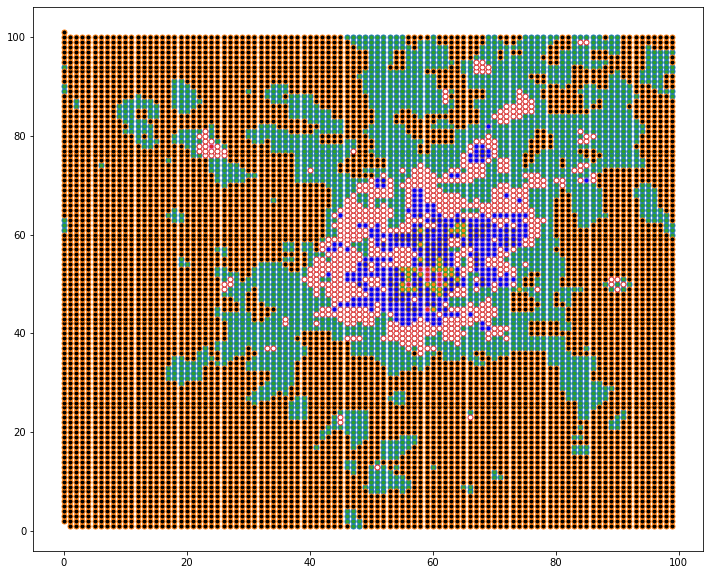

In [225]:
#Draw temporal cluster
x_cor=list()
y_cor=list()
cluster_coordinates={}
for i in range(7): #initializing the lists
    cluster_coordinates["cluster"+str(i+1)+"x"]=[]
    cluster_coordinates["cluster"+str(i+1)+"y"]=[]
    
for i in range(10000):
    #appending the co-ordinates according to the cluster specified by target
    x_cor.append(sorted_index_cluster_cells[i]%100)
    if (x_cor==0):
        x_cor=100
    y_cor.append((sorted_index_cluster_cells[i]//100)+1)
    cluster_coordinates["cluster"+str(sorted_index_cluster_list[i]+1)+"x"].append(x_cor[i])
    cluster_coordinates["cluster"+str(sorted_index_cluster_list[i]+1)+"y"].append(y_cor[i])
marker_colors={0:'tab:green',1:'k',2:'tab:orange',3:'w',4:'b',5:'b',6:'tab:red'} #0:'#bada55',1:'#7fe5f0',9:'#420420'
plt.figure(figsize=(12,10))
for i in range(7):
    plt.plot(cluster_coordinates["cluster"+str(i+1)+"x"],cluster_coordinates["cluster"+str(i+1)+"y"], linestyle='None', marker='o', markersize=5, markerfacecolor=marker_colors[i], label="cluster"+str(i+1))
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0,prop={'size': 30},markerscale=8)
plt.show()



In [223]:
from sklearn.cluster import DBSCAN
from operator import itemgetter
import math
#spatial_cluster=np.zeros([n_clusters,2])
number_occurance=list()
start=[0,0,0,0,0,0,0]
end_data=[0,0,0,0,0,0,0]
index_cluster=[list(a) for a in zip(list(range(1,10001)), y)]
#index_cluster=[list(range(1,1000)),y[1:1001]]
spatial_cluster=list()
sorted_index_cluster = sorted(index_cluster,key=lambda x: x[1])
#print(sorted_index_cluster)
#print(index_cluster)
#sorted_index_cluster=index_cluster[np.argsort(index_cluster[:,1])]
sorted_index_cluster_list=list(i[1] for i in sorted_index_cluster)
sorted_index_cluster_cells=list(i[0] for i in sorted_index_cluster)
#print('e',sorted_index_cluster_cells)
#print(sorted_index_cluster_list)
for j in range(n_clusters):
    number_occurance.append(sorted_index_cluster_list.count(j))
print(number_occurance)
for i in range(n_clusters):
    x=np.zeros([number_occurance[i],2])
    if (i==0):
        start[i]=0
        end_data[i]=number_occurance[0]-1
    else:
        start[i]=end_data[i-1]+1
        end_data[i]=end_data[i-1]+number_occurance[i]
    x[:,0]=x_cor[start[i]:end_data[i]+1]
    x[:,1]=y_cor[start[i]:end_data[i]+1]
    #print(x)
    #x=x.reshape(-1,1)
    spatial_cluster.append(list(DBSCAN(eps=1.4142,min_samples=1).fit_predict(x)))
    #print('s',start)
    #print('e',end_data)
   # print(np.shape(x))
n_spatial_temporal=[0,0,0,0,0,0,0]
random_pts=0
for i in range(n_clusters):
    n_spatial_temporal[i]=max(spatial_cluster[i])
    random_pts=random_pts+spatial_cluster[i].count(-1)
    print('s',n_spatial_temporal)
print(random_pts)
#print(cluster0)
#cluster0=cluster0[np.argsort(cluster0[0,:])]
#cluster1[0,:]=spatial_cluster[1]
#cluster1[1,:]=sorted_index_cluster_cells[start[1]:end_data[1]+1]
cluster_1=[list() for p in range (n_clusters)]
for i in range(n_clusters):
    cell_index=np.subtract(sorted_index_cluster_cells[start[i]:end_data[i]+1],np.ones((end_data[i]+1-start[i]),dtype=int))
    cluster_1[i]=[list(a) for a in zip(spatial_cluster[i],cell_index)]
#print(np.sum(day_activity_agg_arry_norm[[1,2,3,4]],axis=0).max())
max_normlized_traffic=np.zeros([n_clusters,max(n_spatial_temporal)])
max_normlized_traffic_random=np.zeros([n_clusters,1])
#print(sorted_index_cluster_cells)
for i in range(n_clusters):
    tempList_random = [(u[1]) for u in cluster_1[i] if u[0] == -1]
    traffic_random=np.sum(day_activity_agg_arry_norm[tempList_random],axis=0).max()
    max_normlized_traffic_random[i]=traffic_random
    for j in range(n_spatial_temporal[i]):
        tempList = [(u[1]) for u in cluster_1[i] if u[0] == j]
        traffic=np.sum(day_activity_agg_arry_norm[tempList],axis=0).max()
        #print(traffic)
        max_normlized_traffic[i,j]=traffic
bbu=np.sum(max_normlized_traffic,axis=1)
bbu_unclustered=np.sum(day_activity_agg_arry_norm,axis=0).max()
bbu_tpclu=[math.ceil(number) for number in bbu]
bbu_clu=np.sum(bbu_tpclu)
print('ra',np.sum(max_normlized_traffic_random))
print(bbu_tpclu)
print(bbu_clu)
print(bbu_unclustered)



[2319, 6657, 36, 613, 249, 116, 10]
s [63, 0, 0, 0, 0, 0, 0]
s [63, 23, 0, 0, 0, 0, 0]
s [63, 23, 12, 0, 0, 0, 0]
s [63, 23, 12, 65, 0, 0, 0]
s [63, 23, 12, 65, 42, 0, 0]
s [63, 23, 12, 65, 42, 25, 0]
s [63, 23, 12, 65, 42, 25, 4]
0
ra 0.0
[75, 51, 15, 56, 40, 32, 7]
276
225.73518007790912


In [202]:
import binpacking
traffic_sp_temp=np.zeros([n_clusters,max(n_spatial_temporal)])
time_samples=168
int_bin1=np.zeros([1,time_samples])
fraction_bin1=np.zeros([1,time_samples])
for day_n in range(0,time_samples):
    for i in range(n_clusters):
        for j in range(n_spatial_temporal[i]):
            tempList = [(u[1]) for u in cluster_1[i] if u[0] == j]
            day_activity_agg_arry_normu=day_activity_agg_arry_norm[tempList]
            traffic=np.sum(day_activity_agg_arry_normu[:,(0+6*day_n):(5+6*day_n)],axis=0).max()
            max_normlized_traffic[i,j]=traffic%1
            int_bin1[0,day_n]=int_bin1[0,day_n]+traffic//1
        bins = binpacking.to_constant_volume(max_normlized_traffic[i,:],1)
        fraction_bin1[0,day_n]=fraction_bin1[0,day_n]+len(bins)
total_active_bins=np.add(int_bin1,fraction_bin1)
print(total_active_bins)



[[ 92.  78.  67.  60.  60.  68. 105. 152. 180. 191. 197. 199. 201. 204.
  204. 199. 206. 205. 197. 181. 166. 155. 141. 119.  95.  79.  70.  64.
   60.  71. 105. 157. 187. 194. 198. 200. 204. 202. 201. 202. 205. 207.
  201. 180. 166. 155. 143. 120.  95.  79.  70.  64.  61.  70. 104. 156.
  182. 192. 196. 198. 202. 205. 202. 201. 205. 206. 198. 179. 165. 155.
  141. 121.  98.  81.  70.  65.  60.  68. 102. 157. 184. 194. 201. 202.
  204. 203. 205. 204. 207. 207. 198. 184. 165. 152. 139. 122.  99.  84.
   71.  66.  60.  63.  80. 116. 152. 171. 177. 181. 177. 175. 176. 178.
  185. 183. 180. 170. 160. 149. 141. 124. 108.  88.  75.  67.  61.  59.
   65.  85. 112. 135. 148. 155. 157. 153. 158. 158. 163. 165. 164. 159.
  153. 145. 133. 119.  97.  82.  71.  64.  60.  65.  92. 127. 143. 166.
  171. 178. 184. 179. 178. 185. 189. 189. 181. 166. 157. 150. 135. 116.]]


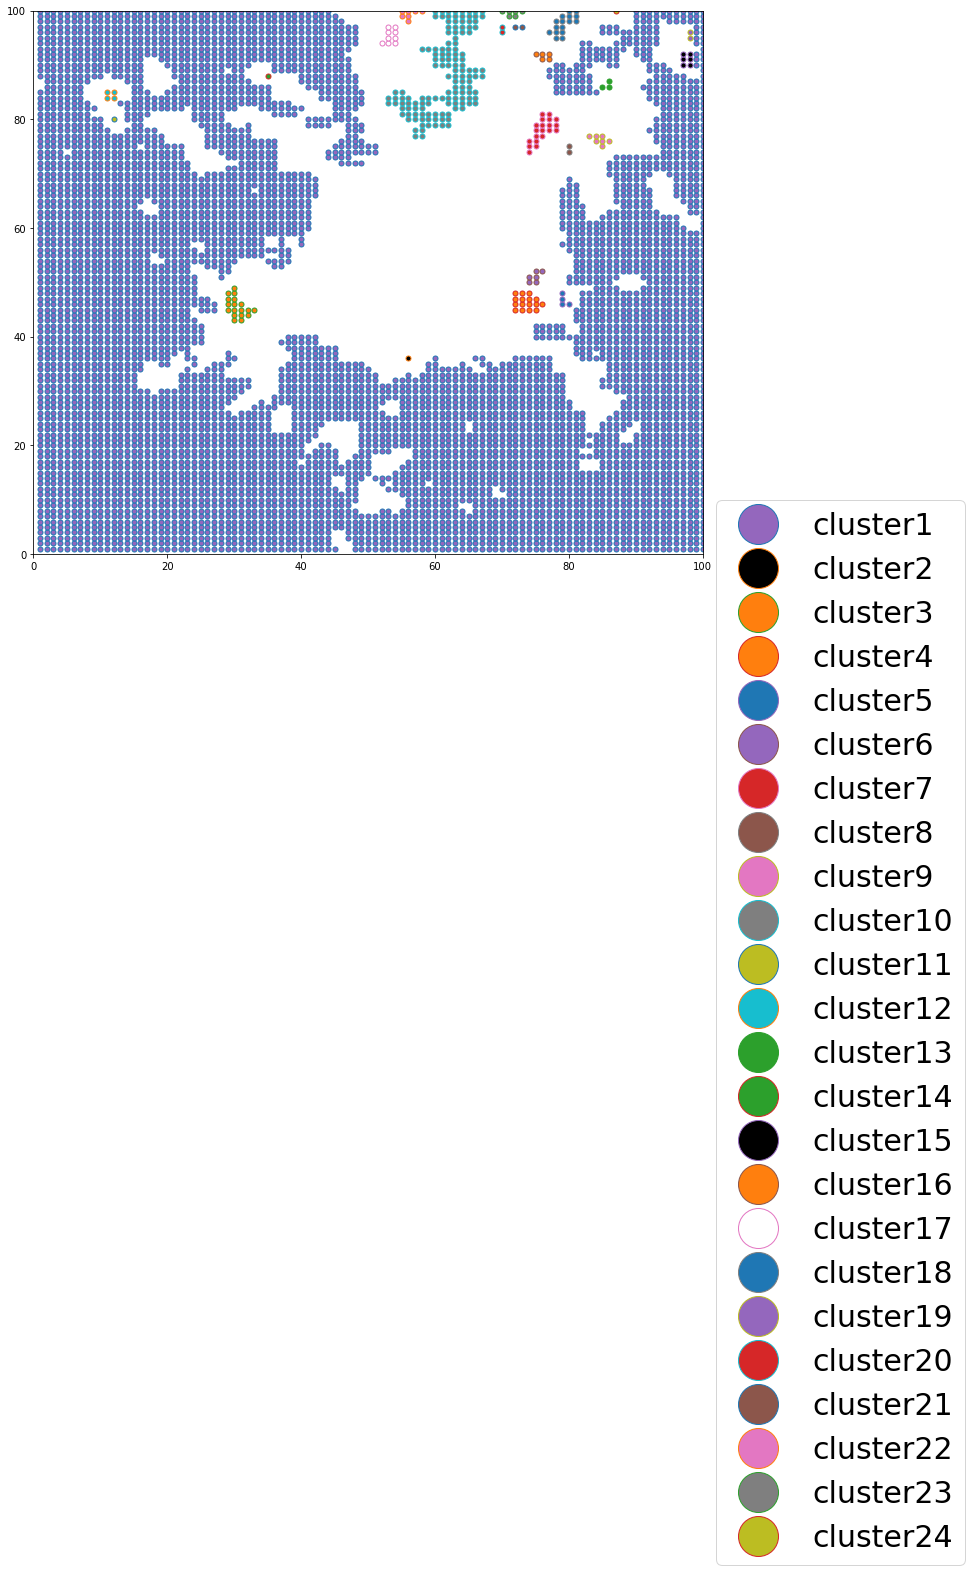

In [238]:
#Draw spatial clusters of temporal 5
x_cor_sp=list()
y_cor_sp=list()
cluster_coordinates_sp={}
for i in range(24): #initializing the lists
    cluster_coordinates_sp["cluster"+str(i)+"x"]=[]
    cluster_coordinates_sp["cluster"+str(i)+"y"]=[]
tempList=[(u[1]) for u in cluster_1[1] ]
sp_cluster_list= [(u[0]) for u in cluster_1[1] ]
#print(sp_cluster_list)
for i in range(6657):
    #appending the co-ordinates according to the cluster specified by target
    x_cor_sp = tempList[i]%100
    #x_cor_sp = [x1%100 for x1 in tempList[i]]
    if (x_cor_sp==0):
        x_cor_sp=100
    #y_cor_sp = [x1//100+1 for x1 in tempList[i]]
    y_cor_sp = tempList[i]//100+1
    cluster_coordinates_sp["cluster"+str(sp_cluster_list[i])+"x"].append(x_cor_sp)
    cluster_coordinates_sp["cluster"+str(sp_cluster_list[i])+"y"].append(y_cor_sp)
marker_colors={0:'tab:purple',1:'k',2:'tab:orange',3:'tab:orange',4:'tab:blue',5:'tab:purple',6:'tab:red',7:'tab:brown',8:'tab:pink',9:'tab:gray',10:'tab:olive',11:'tab:cyan',12:'tab:green',13:'tab:green',14:'k',15:'tab:orange',16:'w',17:'tab:blue',18:'tab:purple',19:'tab:red',20:'tab:brown',21:'tab:pink',22:'tab:gray',23:'tab:olive',24:'tab:cyan',25:'tab:green'} #0:'#bada55',1:'#7fe5f0',9:'#420420'
plt.figure(figsize=(12,10))
for i in range(24):
    plt.plot(cluster_coordinates_sp["cluster"+str(i)+"x"],cluster_coordinates_sp["cluster"+str(i)+"y"], linestyle='None', marker='o', markersize=5, markerfacecolor=marker_colors[i], label="cluster"+str(i+1))
ax = plt.gca()
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
#chartBox = ax.get_position()
#ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0,prop={'size': 30},markerscale=8)
plt.show()